In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [25]:
# we will have a=1 be the disadvantaged group

# portion of disadvantaged group 
rho_a = .4 
p_a = [1-rho_a, rho_a]
# portion of allocation of target variable
rho_z = .2 
p_z = [1-rho_z, rho_z]
# error rate for each group, 0, x means only error in one group
beta = [0, .2] 
# number of samples
N = 200 
# num features
d = 5

# mu where [a][z]
# 5 dim 2 classes for z

In [26]:
# we will have a=1 be the disadvantaged group

# portion of disadvantaged group 
rho_a = .4 
p_a = [1-rho_a, rho_a]
# portion of allocation of target variable
rho_z = .2 
p_z = [1-rho_z, rho_z]
# error rate for each group, 0, x means only error in one group
beta = [0, .2] 
# number of samples
N = 200 
# num features
d = 5

# mu where [a][z]
# 5 dim 2 classes for z
#mu = [[[1,5,3,6,3],[5,1,1,5,2]], [[3,6,2,3,1],[3,2,4,1,1]]]
mu = [[[1,5,3,6,3],[5,1,1,5,2]], [[5,1,1,5,2],[1,5,3,6,3]]]

d_shared = 3 # indices to keep per protected var value
cov = np.eye(d)

In [27]:
a = np.random.choice([0,1], p=p_a, size=N)
z = np.random.choice([0,1], p=p_z, size=N)
x = [np.random.multivariate_normal(mu[a_i][z_i],cov) for a_i, z_i in zip(a,z)]

x = np.asarray(x)

In [28]:
y = z
data = np.asarray([a,z,y]).T
df = pd.DataFrame(data=data, columns = ['a','z','y'])

var_list = []
for i in range(d):
    var = 'x' + str(i)
    df[var] = x[:,i]
    var_list.append(var)
    
df.head()

,a,z,y,x0,x1,x2,x3,x4
0,0,0,0,0.237636,5.488492,4.275797,5.126038,4.209351
1,0,0,0,0.492163,4.751958,4.913297,6.544322,1.913275
2,0,0,0,-0.739315,3.889626,5.098042,6.547028,2.712298
3,0,1,1,7.392317,1.824095,1.786428,5.396846,3.166170
4,0,0,0,1.913227,4.650421,3.962707,3.777318,3.363818


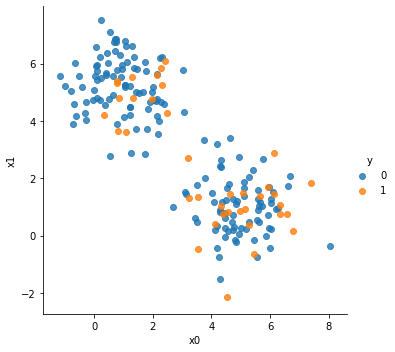

In [29]:
sns.lmplot('x0','x1',df,hue = 'y',fit_reg=False)

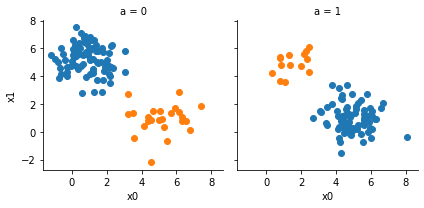

In [30]:
g = sns.FacetGrid(df, col="a",hue = 'y')
g = g.map(plt.scatter, "x0", "x1")

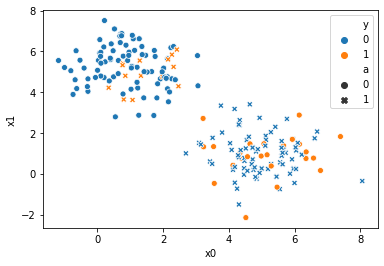

In [31]:
sns.scatterplot(x='x0',y='x1',data=df,hue = 'y', style='a')

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
# split half and half (so we know a)

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
# plot this

In [33]:
x_test.shape

(100, 5)

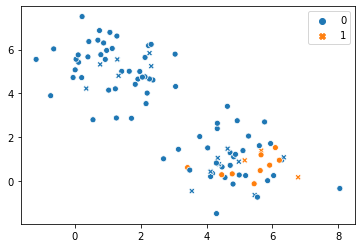

In [34]:
# first column
sns.scatterplot(x=x_test[:,0], y=x_test[:,1], hue=y_pred, style=y_test)